In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nagavamsidharreddy","key":"108d09473f4fd1adb8bf206cb9cc715b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en
!unzip speech-emotion-recognition-en -d speech-emotion-recognition-en

Streaming output truncated to the last 5000 lines.
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_FEA_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_HAP_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_NEU_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_IWW_SAD_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_ANG_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_DIS_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_FEA_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_HAP_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_NEU_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_MTI_SAD_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_ANG_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_DIS_XX.wav  
  inflating: speech-emotion-recognition-en/Crema/1088_TAI_FEA_XX.wav  
  inflating: speech-emotio

In [3]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
from IPython.display import Audio
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout
from keras.models import Sequential
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
Crema='/content/speech-emotion-recognition-en/Crema'

In [14]:
crema=[]
for wav in os.listdir(Crema):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('sad',Crema+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('angry',Crema+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('disgust',Crema+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('fear',Crema+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('happy',Crema+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('neutral',Crema+'/'+wav))
    else:
        crema.append(('unknown',Crema+'/'+wav))

Cr_df = pd.DataFrame.from_dict(crema)
Cr_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Cr_df.head()

,Emotion,File_Path
0,disgust,/content/speech-emotion-recognition-en/Crema/1...
1,sad,/content/speech-emotion-recognition-en/Crema/1...
2,angry,/content/speech-emotion-recognition-en/Crema/1...
3,neutral,/content/speech-emotion-recognition-en/Crema/1...
4,sad,/content/speech-emotion-recognition-en/Crema/1...


In [15]:
Cr_df['Emotion'].unique()

array(['disgust', 'sad', 'angry', 'neutral', 'happy', 'fear'],
      dtype=object)

In [16]:
d = Cr_df
d.to_csv("data_path.csv",index=False)
d.head()

,Emotion,File_Path
0,disgust,/content/speech-emotion-recognition-en/Crema/1...
1,sad,/content/speech-emotion-recognition-en/Crema/1...
2,angry,/content/speech-emotion-recognition-en/Crema/1...
3,neutral,/content/speech-emotion-recognition-en/Crema/1...
4,sad,/content/speech-emotion-recognition-en/Crema/1...


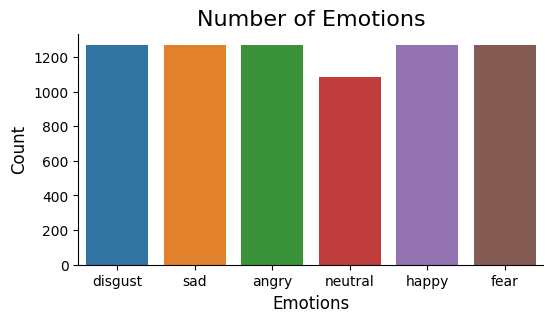

In [17]:
plt.figure(figsize=(6,3))
plt.title('Number of Emotions', size=16)
emotions=sns.countplot(x='Emotion',data=d)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [21]:
def waveplot(data, sr, e):
    plt.figure(figsize=(6, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [22]:
def spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(6, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

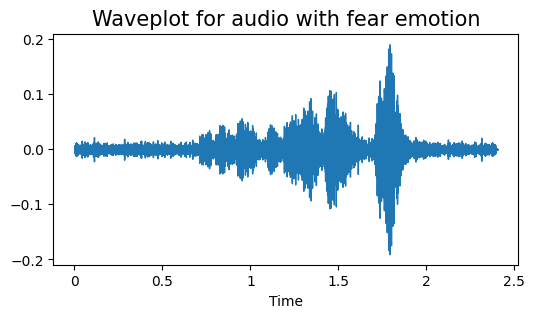

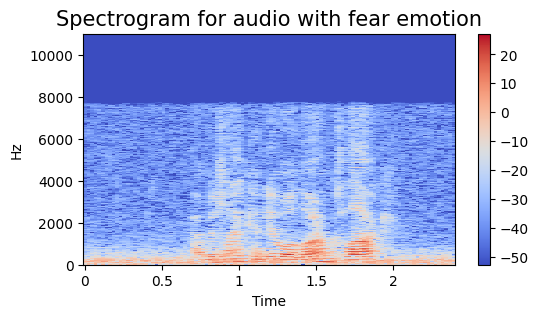

In [23]:
emotion='fear'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

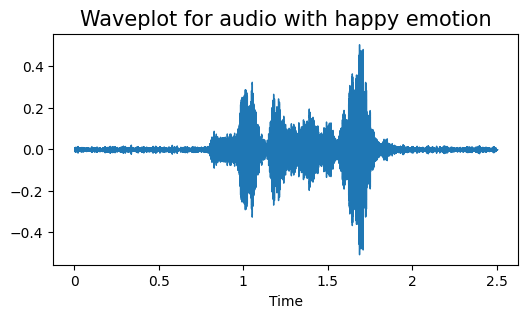

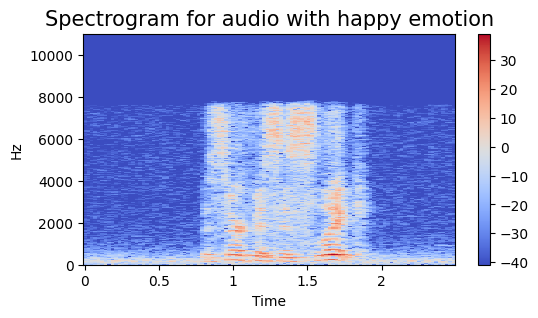

In [24]:
emotion='happy'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

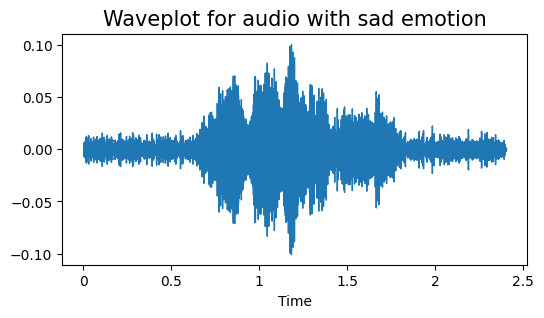

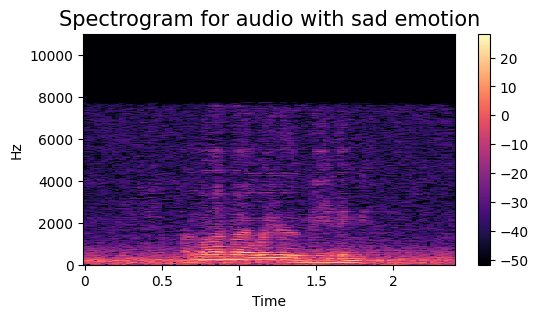

In [25]:
emotion='sad'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

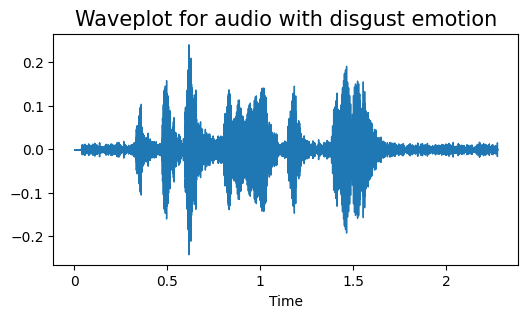

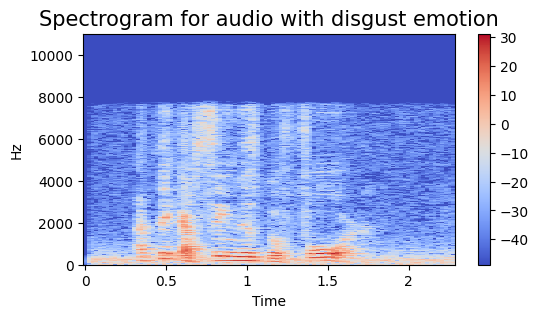

In [26]:
emotion='disgust'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

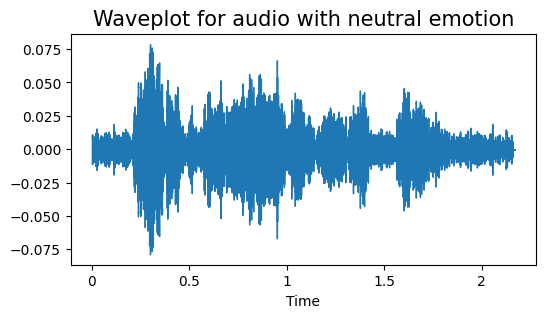

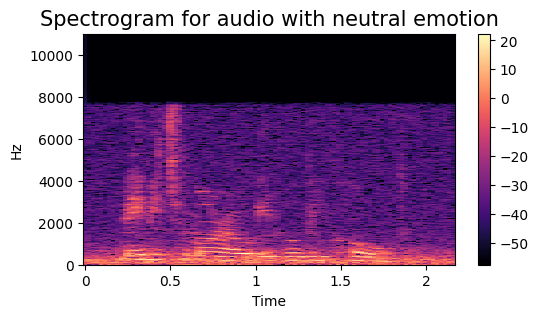

In [27]:
emotion='neutral'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

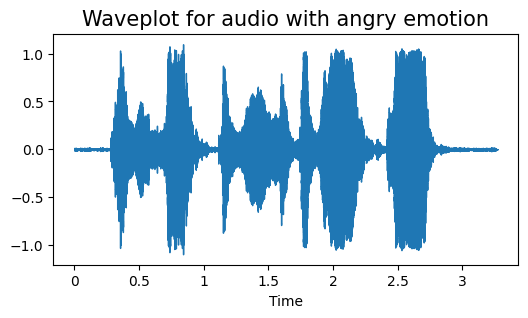

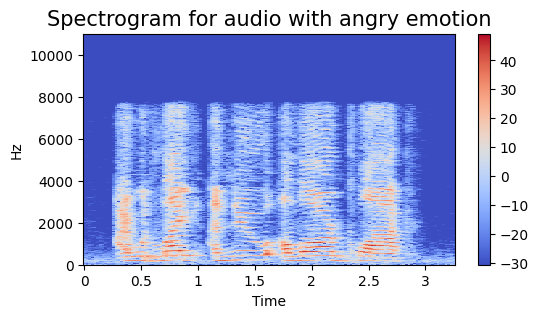

In [29]:
emotion='angry'
path = np.array(d['File_Path'][d['Emotion']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

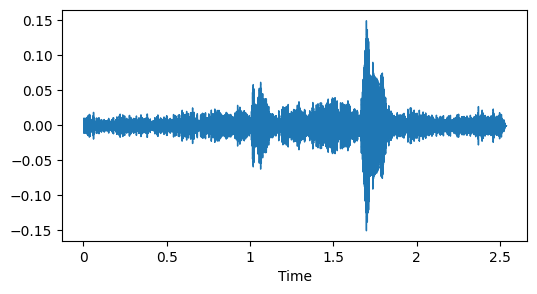

In [31]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_ranges = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_ranges)

path = np.array(d.File_Path)[1]
data, sample_rate = librosa.load(path)

plt.figure(figsize=(6,3))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

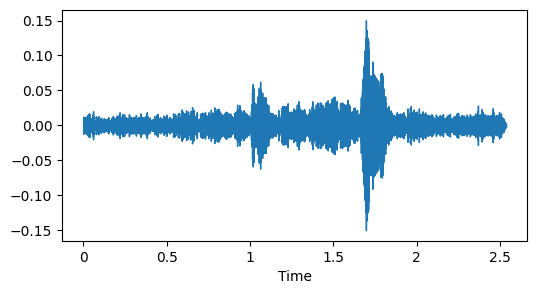

In [32]:
x = noise(data)
plt.figure(figsize=(6,3))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

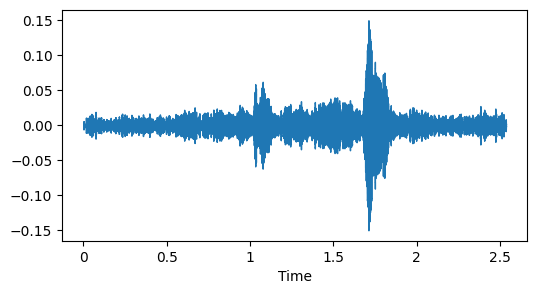

In [33]:
x = shift(data)
plt.figure(figsize=(6,3))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

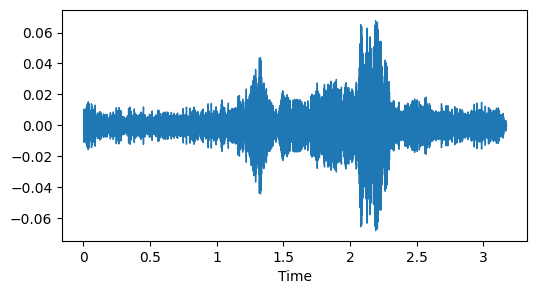

In [34]:
x = stretch(data)
plt.figure(figsize=(6,3))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [35]:
def extract_features(data):

    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result

In [36]:
def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    res1 = extract_features(data)
    result = np.array(res1)

    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))

    return result

In [37]:
X, Y = [], []
for path, emotion in zip(d.File_Path, d.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

In [38]:
len(X), len(Y), d.File_Path.shape

(14884, 14884, (7442,))

In [39]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.061624,0.591499,0.698508,0.658765,0.640573,0.675848,0.602663,0.581947,0.652758,0.728934,...,1.549808e-08,1.431748e-08,1.348160e-08,1.286095e-08,1.240008e-08,1.206927e-08,1.182953e-08,1.167467e-08,1.157888e-08,disgust
1,0.122710,0.697560,0.773044,0.793055,0.764634,0.787496,0.728421,0.632390,0.686565,0.746880,...,2.519298e-04,2.393622e-04,2.427677e-04,2.349123e-04,2.351786e-04,2.333621e-04,2.353280e-04,2.379424e-04,2.448445e-04,disgust
2,0.090216,0.517021,0.558820,0.470563,0.428139,0.479768,0.514296,0.491955,0.509797,0.622422,...,4.783697e-08,4.421883e-08,4.165604e-08,3.975004e-08,3.833139e-08,3.731091e-08,3.656911e-08,3.608856e-08,3.579119e-08,sad
3,0.233073,0.730479,0.748459,0.703177,0.684790,0.731796,0.722165,0.636906,0.656528,0.720507,...,1.640566e-03,1.632514e-03,1.617149e-03,1.666684e-03,1.624692e-03,1.641398e-03,1.624428e-03,1.620749e-03,1.692997e-03,sad
4,0.052490,0.615923,0.558099,0.585437,0.551717,0.517675,0.513469,0.635705,0.593005,0.622171,...,9.601489e-08,9.109812e-08,8.760114e-08,8.498053e-08,8.303608e-08,8.167405e-08,8.069231e-08,8.008649e-08,7.970144e-08,angry


In [40]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [41]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11163, 162), (11163, 6), (3721, 162), (3721, 6))

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11163, 162), (11163, 6), (3721, 162), (3721, 6))

In [44]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11163, 162, 1), (11163, 6), (3721, 162, 1), (3721, 6))

In [45]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=6, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)           0

In [46]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/30
175/175 [==============================] - 78s 436ms/step - loss: 1.6211 - accuracy: 0.3048 - val_loss: 1.5090 - val_accuracy: 0.3609 - lr: 0.0010
Epoch 2/30
175/175 [==============================] - 77s 439ms/step - loss: 1.5167 - accuracy: 0.3568 - val_loss: 1.4651 - val_accuracy: 0.3687 - lr: 0.0010
Epoch 3/30
175/175 [==============================] - 74s 422ms/step - loss: 1.4904 - accuracy: 0.3700 - val_loss: 1.4349 - val_accuracy: 0.4063 - lr: 0.0010
Epoch 4/30
175/175 [==============================] - 72s 410ms/step - loss: 1.4682 - accuracy: 0.3822 - val_loss: 1.4268 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 5/30
175/175 [==============================] - 72s 410ms/step - loss: 1.4501 - accuracy: 0.3968 - val_loss: 1.4151 - val_accuracy: 0.4238 - lr: 0.0010
Epoch 6/30
175/175 [==============================] - 76s 436ms/step - loss: 1.4321 - accuracy: 0.4077 - val_loss: 1.3899 - val_accuracy: 0.4346 - lr: 0.0010
Epoch 7/30
175/175 [==============================] 

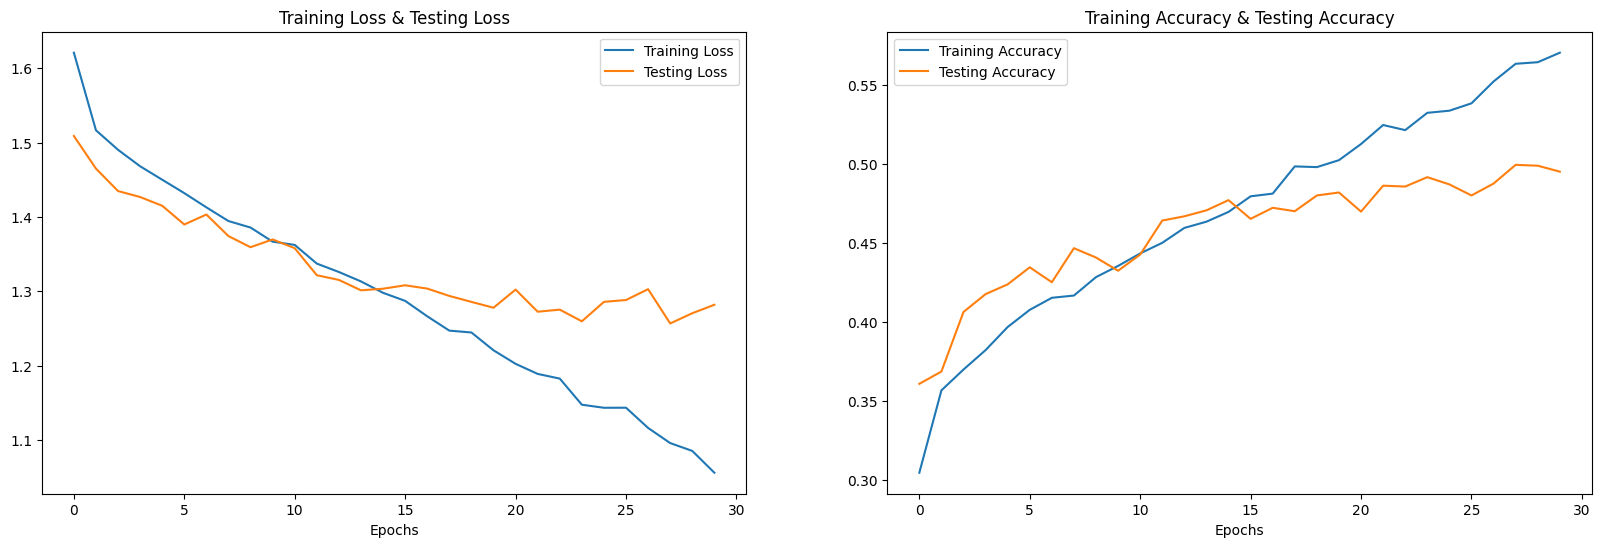

In [48]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training Loss & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training Accuracy & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [49]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

117/117 [==============================] - 7s 53ms/step


In [50]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,angry,angry
2,neutral,disgust
3,disgust,disgust
4,happy,disgust
5,sad,sad
6,happy,happy
7,disgust,happy
8,happy,happy
9,neutral,disgust


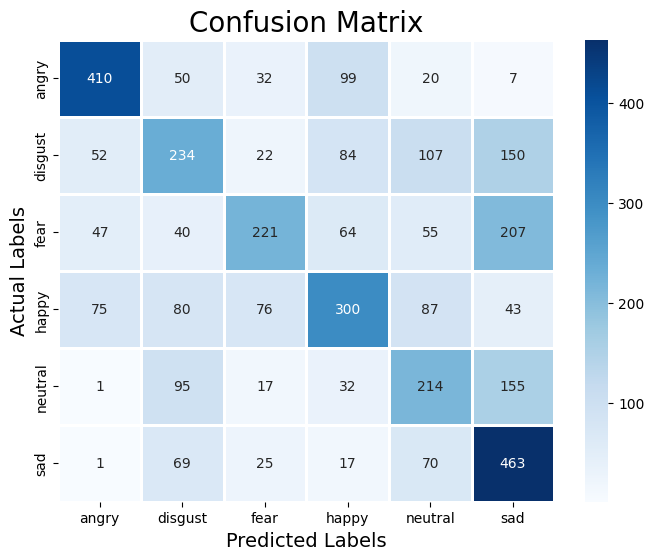

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.70      0.66      0.68       618
     disgust       0.41      0.36      0.38       649
        fear       0.56      0.35      0.43       634
       happy       0.50      0.45      0.48       661
     neutral       0.39      0.42      0.40       514
         sad       0.45      0.72      0.55       645

    accuracy                           0.50      3721
   macro avg       0.50      0.49      0.49      3721
weighted avg       0.51      0.50      0.49      3721

